Enter initial radial distance (AU): 1
Enter initial tangential velocity (AU/yr): 2*np.pi
Enter time step (yr): .02
 Choose numerical method: 1) Euler; 2) Euler-Cromer; 3) Runge-Kutta; 4) Adaptive Runge-Kutta  2


100%|██████████| 50/50 [00:00<00:00, 9279.84it/s]


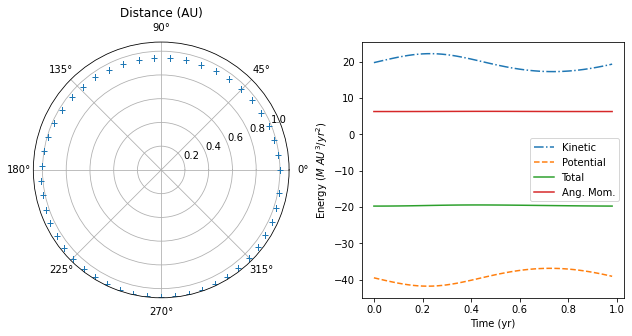

In [48]:
# orbit - Program to compute the orbit of a comet.

# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


def rk4(x,t,tau,derivsRK,param):
    """Runge-Kutta integrator (4th order)
       Input arguments -
        x = current value of dependent variable
        t = independent variable (usually time)
        tau = step size (usually timestep)
        derivsRK = right hand side of the ODE; derivsRK is the
                  name of the function which returns dx/dt
                  Calling format derivsRK (x,t,param).
        param = extra parameters passed to derivsRK
       Output arguments -
        xout = new value of x after a step of size tau
    """
    
    half_tau = 0.5*tau
    F1 = derivsRK(x,t,param)  
    t_half = t + half_tau
    xtemp = x + half_tau*F1
    F2 = derivsRK(xtemp,t_half,param)  
    xtemp = x + half_tau*F2
    F3 = derivsRK(xtemp,t_half,param)
    t_full = t + tau
    xtemp = x + tau*F3
    F4 = derivsRK(xtemp,t_full,param)
    xout = x + tau/6.*(F1 + F4 + 2.*(F2+F3))
    return xout


# Define gravrk function used by the Runge-Kutta routines
def gravrk(s, t, GM):
    """
    Returns the right-hand side of the Kepler ODE; used by Runge-Kutta routines
    :param s: State vector [r(0), r(1), v(0), v(1)]
    :param t: Time (not used here, included to match derivsRK input)
    :param GM: Parameter G*M - gravitational constant * solar mass Units [AU^3/yr^2]
    :return: deriv: Derivatives [dr(0/dt), dr(1)/dt, dv(0)/dt, dv(1)/dt]
    """

    # Compute acceleration
    r = s[:2]  # Unravel the vector s into position and velocity
    v = s[2:]
    accel = -GM * r / np.linalg.norm(r)**3  # Gravitational acceleration

    # Return derivatives
    deriv = np.array([v[0], v[1], accel[0], accel[1]])

    return deriv


# Set initial position and velocity of the comet.
r0 = eval(input('Enter initial radial distance (AU): '))
v0 = eval(input('Enter initial tangential velocity (AU/yr): '))
r = np.array([r0, 0.0])
v = np.array([0.0, v0])

state = np.array([r[0], r[1], v[0], v[1]])  # State used by R-K routines

# Set physical parameters
GM = 4 * np.pi**2  # Gravitational constant * Mass of sun [AU^3/yr^2]
mass = 1.0  # Mass of comet (reference mass)
adaptErr = 1.0E-3  # Error parameter used by adaptive Runge-Kutta
time = 0.0

# Loop over the desired number of steps using the specified numerical method.

tau = eval(input('Enter time step (yr): '))
nStep = int(1/tau)
NumericalMethod = eval(input(' Choose numerical method: 1) Euler; 2) Euler-Cromer; 3) Runge-Kutta; 4) Adaptive Runge-Kutta  '))

rplot = np.empty(nStep)
thplot = np.empty(nStep)
tplot = np.empty(nStep)
kinetic = np.empty(nStep)
potential = np.empty(nStep)
lplot = np.empty(nStep)

for iStep in tqdm(range(nStep)):

    # Record position and energy for plotting
    rplot[iStep] = np.linalg.norm(r)  # Record radial position and angle for polar plot
    thplot[iStep] = np.arctan2(r[1], r[0])
    tplot[iStep] = time
    kinetic[iStep] = 0.5*mass*np.linalg.norm(v)**2  # Record kinetic and potential energy
    potential[iStep] = - GM*mass/np.linalg.norm(r)
    lplot[iStep] = rplot[iStep]*np.sqrt(2*kinetic[iStep])

    # Calculate new position and velocity using the desired method
    if NumericalMethod == 1:
        accel = -GM*r/np.linalg.norm(r)**3
        r += tau*v  # Euler Step
        v += tau*accel
        time += tau
    elif NumericalMethod == 2:
        accel = -GM * r / np.linalg.norm(r) ** 3
        v += tau * accel
        r += tau * v  # Euler-Cromer Step
        time += tau
    elif NumericalMethod == 3:
        state = rk4(state, time, tau, gravrk, GM)
        r = state[:2]  # 4th Order Runge-Kutta
        v = state[2:]
        time += tau
    elif NumericalMethod == 4:
        state, time, tau = rka(state, time, tau, adaptErr, gravrk, GM)
        r = state[:2]  # 4th Order Runge-Kutta
        v = state[2:]
    else:
        raise ValueError('Invalid NumericalMethod input. Choose: 1) Euler; 2) Euler-Cromer; 3) Runge-Kutta; 4) Adaptive Runge-Kutta  ')

# Graph the trajectory  and energy of the comet over time.
totalE = kinetic + potential  # total energy

fig = plt.figure(figsize=(10.0, 5.25))
ax = fig.add_subplot(121, polar=True)
ax.plot(thplot, rplot, '+',)
ax.set_title('Distance (AU)')
ax.grid(True)
fig.tight_layout(pad=5.0)

ax2 = fig.add_subplot(122)
ax2.plot(tplot, kinetic, ls='-.', label='Kinetic')
ax2.plot(tplot, potential, ls='--', label='Potential')
ax2.plot(tplot, totalE, ls='-', label='Total')
ax2.plot(tplot, lplot, ls='-', label='Ang. Mom.')
ax2.set_xlabel('Time (yr)')
ax2.set_ylabel(r'Energy ($M~AU^3/yr^2$)')
ax2.legend()

plt.show()

In [49]:
Q = r0 #aphelion
q = min(rplot) #perihelion
eccent = 2/(1+q/Q)-1 #eccentiricty
semimajor = (q+Q)/2 #semimajor axis 
Period = semimajor**(3/2)

print("The period is: ", Period, "years.")
print("The semimajor axis length is: ", semimajor, "AU.")
print("The eccentricity is: ", eccent)
print("The perihelion is :", q, "AU.")

The period is:  0.9589874666374053 years.
The semimajor axis length is:  0.9724679286785256 AU.
The eccentricity is:  0.028311546848529323
The perihelion is : 0.9449358573570513 AU.


In [50]:
E_th = -GM/2 # E=-GMm/r ; set m=1, r=1 (AU)
L_th = 2*np.pi # L=rmv ; v=2pi (AU/yr)
eccent_th = np.sqrt(1+(2*E_th*L_th*L_th/(GM)**2))       #formula provided in problem
e_percent_error = abs((eccent-eccent_th)/eccent_th)*100 #   %-error = |(observed-theory)/theory|
print("The calculated eccentricity is:", eccent)
print("The theoretical eccentricity is:", eccent_th)
print("The percent error for eccentricity is:", e_percent_error, "%")

The calculated eccentricity is: 0.028311546848529323
The theoretical eccentricity is: 1.0536712127723509e-08
The percent error for eccentricity is: 268694218.5439966 %


In [51]:
T = 2*np.pi*semimajor**(3/2)/np.sqrt(GM)

T_percent_error = abs(max(tplot)-T)/T*100
print("The percent error for period is: ", T_percent_error ,"%")

The percent error for period is:  2.19111657801677 %


In [47]:
T_avg = np.mean(kinetic)
U_avg = np.mean(potential)
if T_avg == -U_avg/2:
    print("The virial theorem holds true.")
else:
    diff = T_avg + U_avg/2
    print("The difference in energies is:",diff)
    if diff < 0.001:
        print("The calculated energies are close enough to demonstrate virial theorem")

The difference in energies is: 4.799823191348196e-06
The calculated energies are close enough to demonstrate virial theorem
